In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [3]:
# To illustrate the order of arguments
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [5]:
date_obj = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
date_obj

datetime.datetime(2017, 1, 2, 13, 30, 15)

In [7]:
date_obj.month

1

In [8]:
date_obj_list = [datetime(2016,1,1), datetime(2016,12,31)]
date_obj_ind = pd.DatetimeIndex(date_obj_list)
date_obj_ind

DatetimeIndex(['2016-01-01', '2016-12-31'], dtype='datetime64[ns]', freq=None)

In [17]:
arr = np.random.randn(2,3)
column_names = ('a','b','c')
arr_df = pd.DataFrame(arr,date_obj_ind,column_names)
#Actions
arr_df.loc['2016-01-01']['a']
arr_df.index.argmax()
arr_df.index.max()

Timestamp('2016-12-31 00:00:00')

In [ ]:
#Time resampling lecture

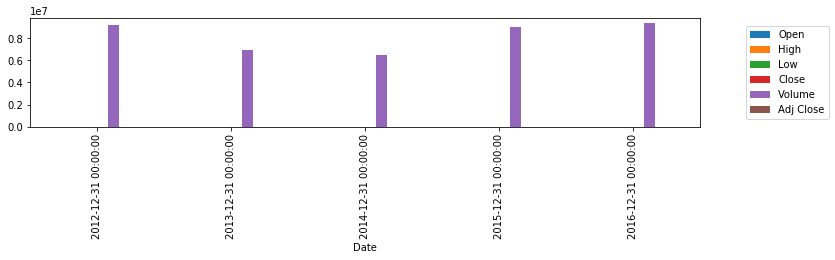

In [39]:
data = pd.read_csv('walmart_stock.csv')
data['Date'] = data['Date'].apply(pd.to_datetime)
data = data.set_index('Date')
data.resample(rule='A').mean().plot(kind='bar', figsize=(12,2))
plt.legend(loc='center right', bbox_to_anchor=(1.2,0.5))

In [41]:
#Shifting lecture

In [45]:
data.shift(1).head()
data.tshift(periods=1, freq='M').head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-01-31,59.970001,61.060001,59.869999,60.330002,12668800,52.619235
2012-01-31,60.209999,60.349998,59.470001,59.709999,9593300,52.078475
2012-01-31,59.349998,59.619999,58.369999,59.419998,12768200,51.825539
2012-01-31,59.419998,59.450001,58.869999,59.000000,8069400,51.459220
2012-01-31,59.029999,59.549999,58.919998,59.180000,6679300,51.616215


In [47]:
#Rolling and expanding

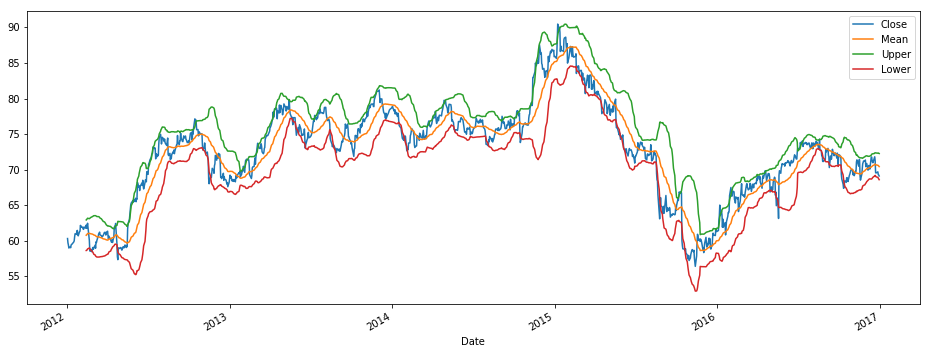

In [51]:
#Bollinger bands

# 30 MA
data['Mean'] = data['Close'].rolling(30).mean()

# 30 MA + 2*stdev
data['Upper'] = data['Close'].rolling(30).mean() + 2*(data['Close'].rolling(30).std())

# 30 MA + 2*stdev
data['Lower'] = data['Close'].rolling(30).mean() - 2*(data['Close'].rolling(30).std())

# Ploting
data[['Close', 'Mean', 'Upper', 'Lower']].plot(figsize=(16,6))